# Polynomial Linear Regression

- y = b0 + b1x1 + b2x1^2 + .... + bnx1^n
- Notice the powers of the x variables to be non-linear, we still call the regression as linear. The reason is the relation between all the coefficients is linear.
- This can be used for multiple features or independent variables in the form of polynomial linear regression.
- y = b0 + b1x1 + b2x1^2 + ... + bnxn^n
- Parabolic style curve
- Eg. Spread of pandemics will have such a curve

In [1]:
import pandas as pd

In [2]:
dataset = pd.read_csv('Position_Salaries.csv')

In [3]:
dataset

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


In [4]:
X = dataset.iloc[:, 1:-1].values
y = dataset.iloc[:, -1].values

In [5]:
X

array([[ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10]])

In [6]:
y

array([  45000,   50000,   60000,   80000,  110000,  150000,  200000,
        300000,  500000, 1000000])

1. Creating a Linear Regression model to compare later with the polynomial regression
2. Building a matrix with the single predictor X and its various powers
3. We will use this martrix to train the linear regression model on these powers making it the polynomial regression model

In [7]:
from sklearn.linear_model import LinearRegression

In [8]:
lin_reg = LinearRegression()
lin_reg.fit(X, y)

LinearRegression()

In [9]:
from sklearn.preprocessing import PolynomialFeatures

In [10]:
poly_reg_deg2 = PolynomialFeatures(degree=2)
poly_reg_deg2.fit(X)
X_poly_deg2 = poly_reg_deg2.transform(X)

In [11]:
X_poly_deg2

array([[  1.,   1.,   1.],
       [  1.,   2.,   4.],
       [  1.,   3.,   9.],
       [  1.,   4.,  16.],
       [  1.,   5.,  25.],
       [  1.,   6.,  36.],
       [  1.,   7.,  49.],
       [  1.,   8.,  64.],
       [  1.,   9.,  81.],
       [  1.,  10., 100.]])

In [12]:
lin_reg_deg2 = LinearRegression()
lin_reg_deg2.fit(X_poly_deg2, y)

LinearRegression()

In [13]:
from matplotlib import pyplot as plt

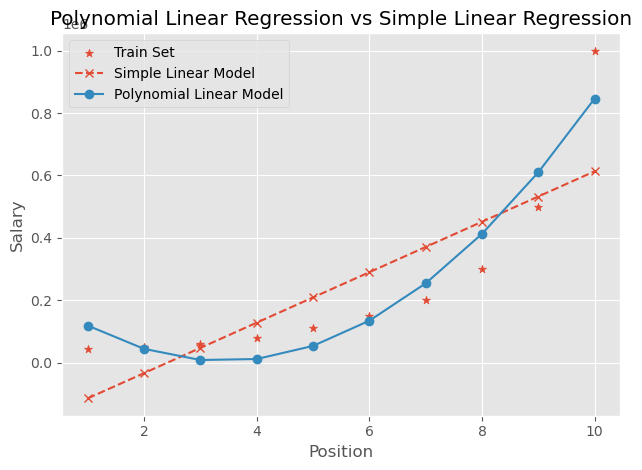

In [14]:
plt.style.use('ggplot')
plt.scatter(X, y, label='Train Set', marker='*')
plt.plot(X, lin_reg.predict(X), label='Simple Linear Model', linestyle='--', marker='x')
plt.plot(X, lin_reg_deg2.predict(X_poly_deg2), label='Polynomial Linear Model', marker='o')
plt.title('Polynomial Linear Regression vs Simple Linear Regression')
plt.xlabel('Position')
plt.ylabel('Salary')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

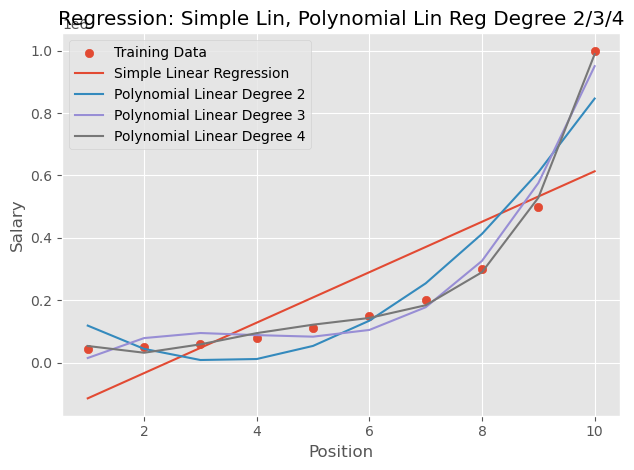

In [17]:
poly_reg_deg3 = PolynomialFeatures(degree = 3)
poly_reg_deg3.fit(X)
X_poly_deg3 = poly_reg_deg3.transform(X)

lin_reg_deg3 = LinearRegression()
lin_reg_deg3.fit(X_poly_deg3, y)

poly_reg_deg4 = PolynomialFeatures(degree = 4)
poly_reg_deg4.fit(X)
X_poly_deg4 = poly_reg_deg4.transform(X)

lin_reg_deg4 = LinearRegression()
lin_reg_deg4.fit(X_poly_deg4, y)

plt.scatter(X, y, label='Training Data')
plt.plot(X, lin_reg.predict(X), label='Simple Linear Regression')
plt.plot(X, lin_reg_deg2.predict(X_poly_deg2), label='Polynomial Linear Degree 2')
plt.plot(X, lin_reg_deg3.predict(X_poly_deg3), label='Polynomial Linear Degree 3')
plt.plot(X, lin_reg_deg4.predict(X_poly_deg4), label='Polynomial Linear Degree 4')
plt.legend(loc='best')
plt.title('Regression: Simple Lin, Polynomial Lin Reg Degree 2/3/4')
plt.xlabel('Position')
plt.ylabel('Salary')
plt.tight_layout()
plt.show()

In [18]:
lin_reg.predict([[6.5]])

array([330378.78787879])

In [19]:
lin_reg_deg4.predict(poly_reg_deg4.fit_transform([[6.5]]))

array([158862.45265153])